## 1. Install packages it not done yet
install.packages('ggplot2')  
install.packages('tidyverse') and so on

## 2. Load libray

In [1]:
library(graphics)
library(ggplot2)
# library(tidyverse)

## 3. Get dataset  
Data source: https://www.dropbox.com/s/choyyyvfg9byj8h/Cuzick_2010_breast_cancer_density.csv?dl=0

### Read csv

In [2]:
cancer_df <- read.csv('data/Cuzick_2010_breast_cancer_density.csv')

### Structure of df

In [3]:
str(cancer_df)

'data.frame':	1065 obs. of  5 variables:
 $ case   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ARM    : int  1 1 1 2 1 1 2 1 1 2 ...
 $ AGE    : int  38 43 46 52 59 62 35 58 51 40 ...
 $ BMI    : num  21.8 32.3 23 19.6 26.2 23.7 27.9 25.8 27.7 38.4 ...
 $ density: int  40 5 45 40 40 80 25 15 10 20 ...


### Summarize each column (min, max, mean,..)

In [4]:
summary(cancer_df)

      case             ARM             AGE             BMI       
 Min.   :0.0000   Min.   :1.000   Min.   :35.00   Min.   :17.60  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:46.00   1st Qu.:23.20  
 Median :0.0000   Median :1.000   Median :49.00   Median :25.70  
 Mean   :0.1155   Mean   :1.476   Mean   :50.17   Mean   :26.72  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:54.00   3rd Qu.:29.40  
 Max.   :1.0000   Max.   :2.000   Max.   :70.00   Max.   :50.40  
                                                  NA's   :16     
    density      
 Min.   :  0.00  
 1st Qu.: 15.00  
 Median : 40.00  
 Mean   : 44.45  
 3rd Qu.: 70.00  
 Max.   :100.00  
                 

### View a dataframe

In [5]:
head(cancer_df, 2)

case,ARM,AGE,BMI,density
1,1,38,21.8,40
0,1,43,32.3,5


In [6]:
tail(cancer_df, 2)

,case,ARM,AGE,BMI,density
1064,0,2,49,30.9,40
1065,0,2,47,21.7,90


## 4. Data visualization with ggplot  
Ref: https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf

### Change figure sizes over the notebook

In [7]:
options(repr.plot.width = 4, repr.plot.height = 3.5)

### ggplot overview   
<b> 3 key elements
1. data
2. mapping / aes() (aesthetic: what you want plot look like)
3. geom_ -- what is the geometry of the plot  
</b>
(Note: R is case sensitive but space is NOT matter)

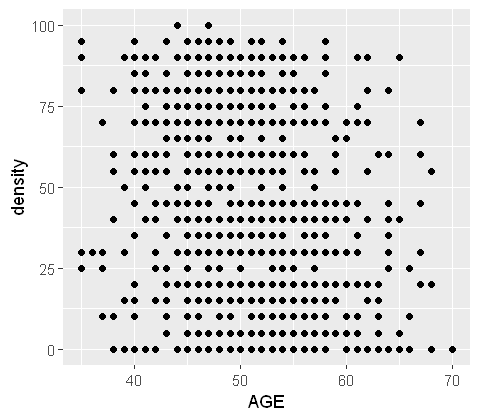

In [8]:
ggplot(data = cancer_df, 
       mapping = aes(x = AGE, 
                     y = density)) + 
   geom_point()

Warning message:
"Removed 16 rows containing missing values (geom_point)."

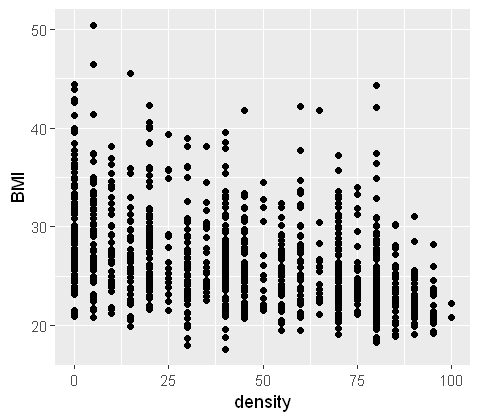

In [9]:
ggplot(cancer_df, aes(x = density, 
                      y = BMI)) + 
   geom_point()

### Save a figure

In [10]:
ggsave('BMI_vs_Density.png', width=6, height=4) 

Warning message:
"Removed 16 rows containing missing values (geom_point)."

### Help 

In [11]:
# help file for geom_point - uncomment the line below
# ?geom_point

Warning message:
"Removed 16 rows containing missing values (geom_point)."

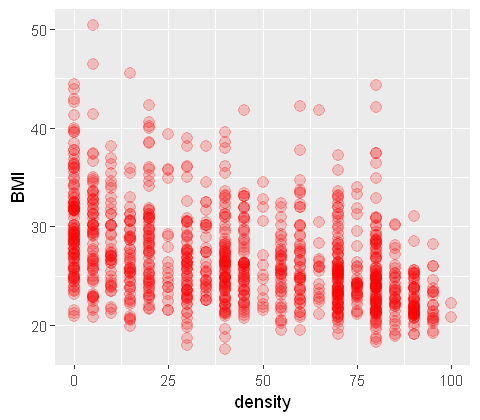

In [12]:
ggplot(cancer_df, 
       aes(x = density, 
           y = BMI)) + 
   geom_point(colour='red', 
              size=3, 
              alpha=0.2)

Warning message:
"Removed 16 rows containing missing values (geom_point)."

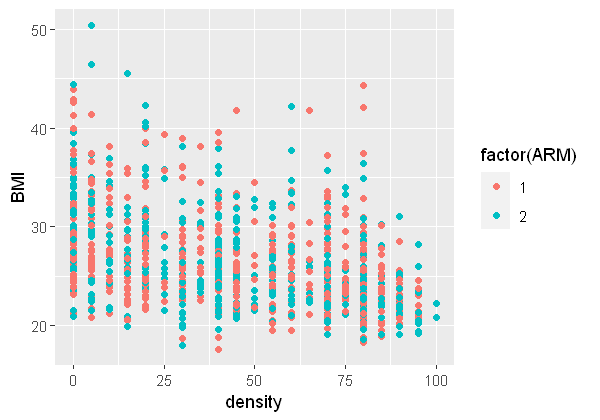

In [13]:
options(repr.plot.width = 5, repr.plot.height = 3.5)

ggplot(cancer_df, 
       aes(x = density, 
           y = BMI,
           colour = factor(ARM) # color by ARM
       )) + 
   geom_point()

Warning message:
"Removed 16 rows containing missing values (geom_point)."

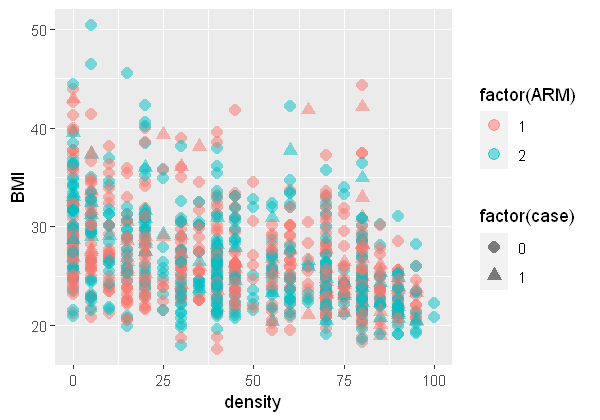

In [14]:
ggplot(cancer_df, 
       aes(x = density, 
           y = BMI,
           color = factor(ARM), # color by 'ARM' column
           shape = factor(case) # point shape by 'case' column 
       )) + 
   geom_point(size=3, 
              alpha=0.5)

### Bar plot

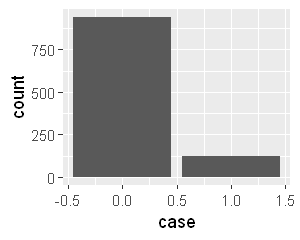

In [15]:
options(repr.plot.width = 2.5, repr.plot.height = 2)

ggplot(cancer_df, aes(x=case)) +
   geom_bar()

### Create new column in df

In [16]:
cancer_df$case_f <- ifelse(cancer_df$case == 1,
                           'Cancer',
                           'No Cancer')

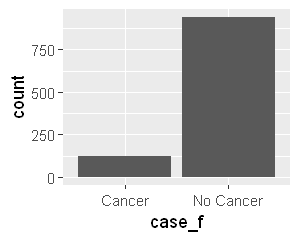

In [17]:
ggplot(cancer_df, aes(x=case_f)) +
   geom_bar()

### Re-arrange order

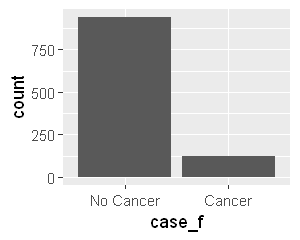

In [18]:
cancer_df$case_f <- factor(cancer_df$case_f,
                           levels = c('No Cancer',  # define the order. No Cancer on the left
                                      'Cancer')     # Cancer on the right
                           )

ggplot(cancer_df, aes(x=case_f)) +
   geom_bar()

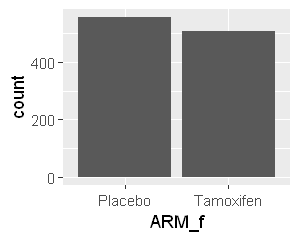

In [19]:
# Create new column in df
cancer_df$ARM_f <- ifelse(cancer_df$ARM == 1,
                           'Placebo',
                           'Tamoxifen')
cancer_df$ARM_f <- factor(cancer_df$ARM_f,
                           levels = c('Placebo',   # Placebo on the left
                                      'Tamoxifen') # Tamoxifen on the right    
                           
                           )
ggplot(cancer_df, aes(x=ARM_f)) +
   geom_bar()

### Vertical stack bar

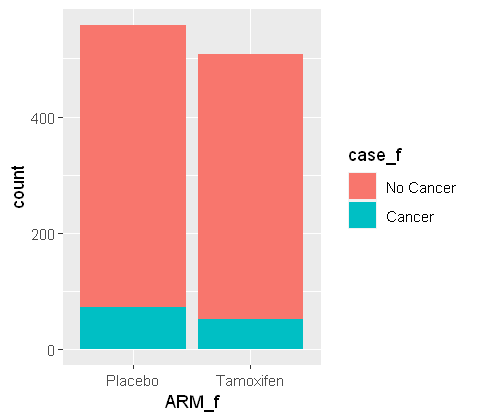

In [22]:
options(repr.plot.width = 4, repr.plot.height = 3.5)

ggplot(cancer_df, aes(x=ARM_f, 
                      fill = case_f # fill make vertical stack bar
                     )  
       ) +
   geom_bar()

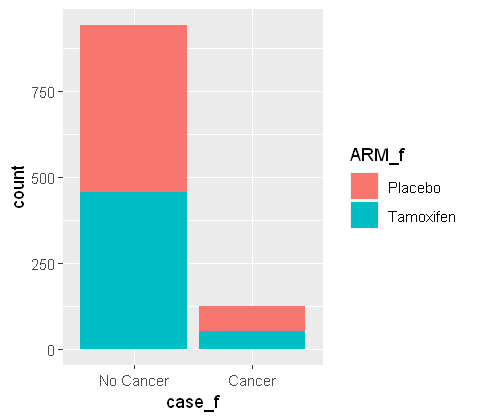

In [23]:
ggplot(cancer_df, aes(x=case_f, 
                      fill = ARM_f # fill make vertical stack bar
      )) +
   geom_bar()

### Horizontal stack

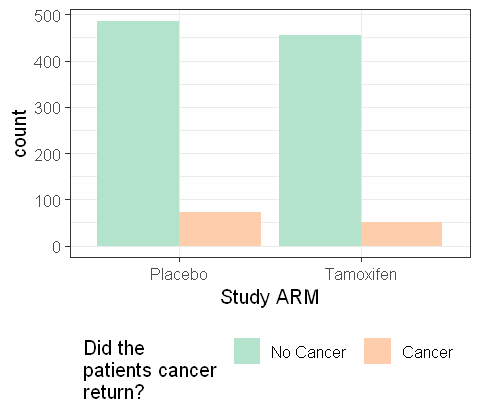

In [25]:
ggplot(cancer_df, aes(x=ARM_f, 
                      fill = case_f # fill make vertical stack 
                                    # but it changes to horizontal stack as below
)) +
   geom_bar(position = 'dodge') + # make horizontal stack
   # Make more beautiful image
   labs(fill = 'Did the \npatients cancer\nreturn?',
        x = "Study ARM") +
   # Change background. Default theme_gray
   theme_bw(base_size = 12  # font
            ) + 
   # Change theme
   theme(legend.position = 'bottom') +
   # scale_fill_brewer
   scale_fill_brewer(palette = 'Pastel2')

### Point (NO jitter)

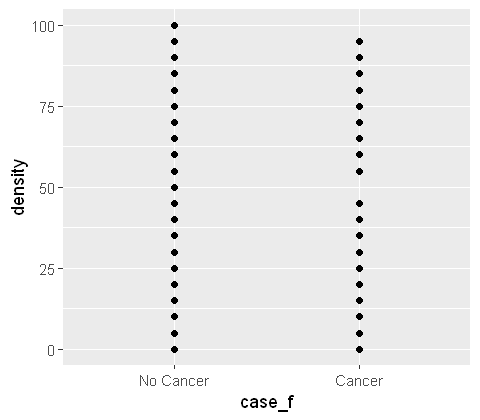

In [27]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_point()

### Point with jitter

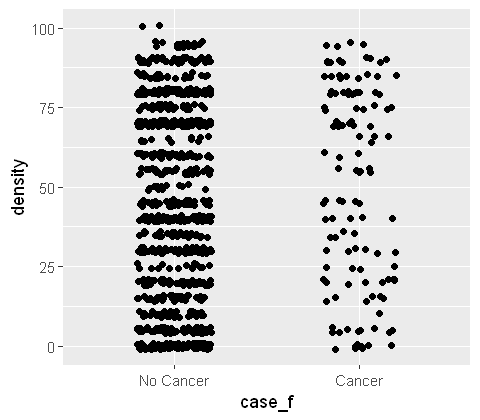

In [28]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_jitter(width = 0.2, height = 1)

### boxplot

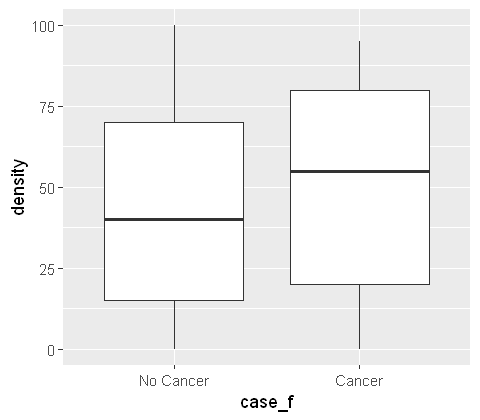

In [29]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_boxplot()

### boxplot and jitter

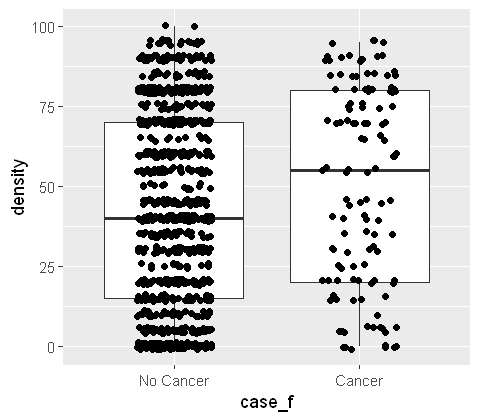

In [30]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_boxplot() + 
   geom_jitter(width = 0.2, height = 1)

### Violin and jitter

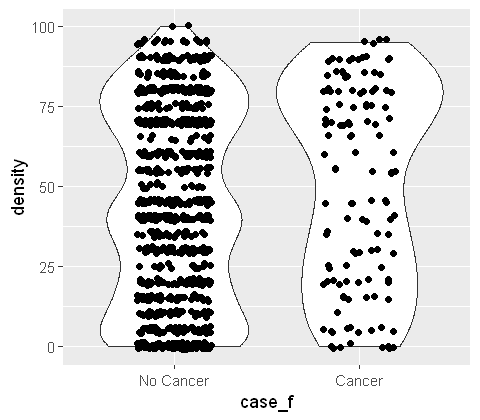

In [31]:
ggplot(cancer_df, aes(x = case_f, y = density)) + 
   geom_violin() + 
   geom_jitter(width = 0.2, height = 1)

### boxplot with color_by and jitter

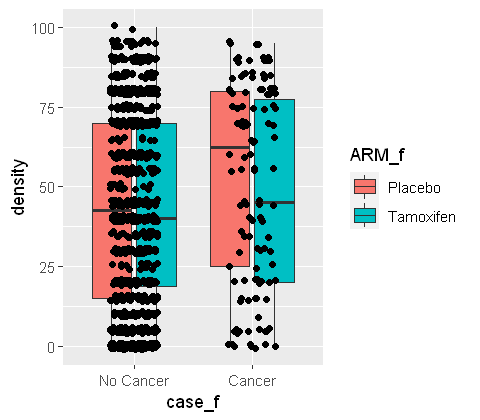

In [32]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_boxplot(aes(fill = ARM_f)) +  # Boxplot with color by                     
   geom_jitter(width = 0.2, height = 1)

### Facet and boxplot with color_by and jitter

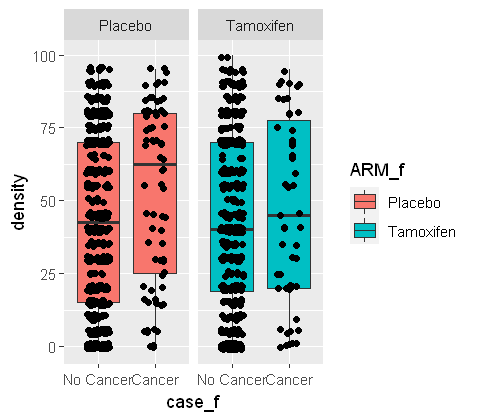

In [33]:
ggplot(cancer_df, 
       aes(x = case_f, 
           y = density)) + 
   geom_boxplot(aes(fill = ARM_f)) +   # Boxplot with color by   
   geom_jitter(width = 0.2, height = 1) +
   facet_wrap(~ARM_f)

### Histogram

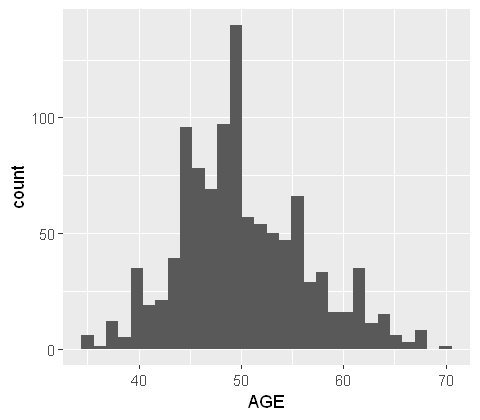

In [36]:
ggplot(cancer_df, 
       aes(x=AGE)) +
   geom_histogram(bins = 30)

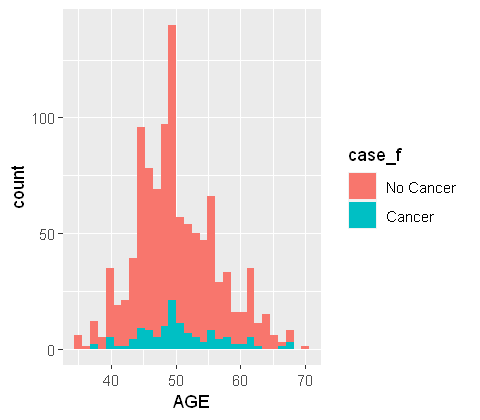

In [34]:
ggplot(cancer_df, 
       aes(x=AGE, 
           fill=case_f) # color_by
      ) +
   geom_histogram(bins = 30)

### Density

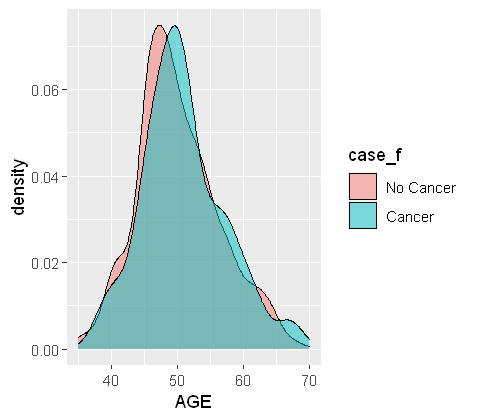

In [37]:
ggplot(cancer_df, 
       aes(x=AGE, 
           fill=case_f)) +
   geom_density(alpha = 0.5)

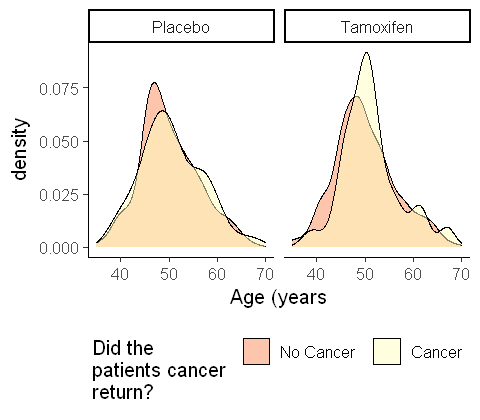

In [39]:
ggplot(cancer_df, 
       aes(x=AGE, 
           fill=case_f)) +
   geom_density(alpha = 0.5) + 
   facet_wrap(~ARM_f,
              #ncol = 1   # make only one column figure
              ) + 
   labs(x = 'Age (years',
        fill = 'Did the \npatients cancer\nreturn?') + 
   theme_classic(base_size = 12) + 
   theme(legend.position = 'bottom') + 
   scale_fill_brewer(palette = 'Spectral')